In [12]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from tqdm import tqdm

seed = 42
rng = RandomState(seed)

df = pd.read_csv('./dataset/preprocessed.csv')

X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

(12599, 59) (12599,)


In [13]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=seed)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (10079, 59) (10079,)
Test set:  (2520, 59) (2520,)


In [14]:
# Fill missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [15]:
# Train Naive Bayes, random forest & SVM with their best params
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Gmodel=GaussianNB()
rf = RandomForestClassifier(criterion='entropy', n_estimators=100, 
                            random_state=rng)
sv = SVC(kernel='rbf', C=15.0)

Gmodel.fit(X_train, y_train)
rf.fit(X_train, y_train)
sv.fit(X_train, y_train)

SVC(C=15.0)

In [16]:
Gmodel_pred = Gmodel.predict(X_test)
rf_pred = rf.predict(X_test)
sv_pred = sv.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix

Gmodel_acc = accuracy_score(y_test, Gmodel_pred)
rf_acc = accuracy_score(y_test, rf_pred)
sv_acc = accuracy_score(y_test, sv_pred)

Gmodel_auc = roc_auc_score(y_test, Gmodel_pred)
rf_auc = roc_auc_score(y_test, rf_pred)
sv_auc = roc_auc_score(y_test, sv_pred)

print('NB acc: %.6f' % Gmodel_acc)
print('Random forest acc: %.6f' % rf_acc)
print('SVM acc: %.6f' % sv_acc)
print()
print('NB AUC: %.6f' % Gmodel_auc)
print('Random forest AUC: %.6f' % rf_auc)
print('SVM AUC: %.6f' % sv_auc)

NB acc: 0.626587
Random forest acc: 0.751984
SVM acc: 0.747222

NB AUC: 0.628155
Random forest AUC: 0.742815
SVM AUC: 0.737471


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


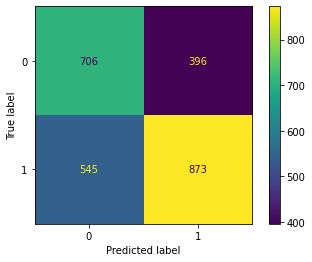

In [18]:
plot_confusion_matrix(Gmodel, X_test, y_test)

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


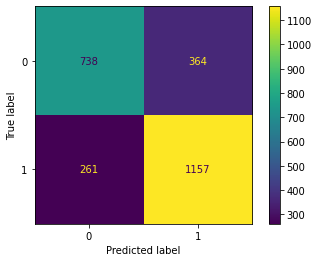

In [19]:
plot_confusion_matrix(rf, X_test, y_test)

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


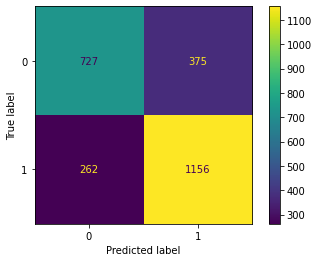

In [20]:
plot_confusion_matrix(sv, X_test, y_test)

In [21]:
coupon_type = ['Bar', 'Carry out & Take away', 'Coffee House', 
               'Restaurant(<20)', 'Restaurant(20-50)']
datasets = {}
for type_name in coupon_type:
    column_name = 'coupon_' + type_name
    data = df[df[column_name] == 1].copy()
    X, y = data.iloc[:, :-1], data.iloc[:, -1]
    
    # fill missing value
    X[:] = imputer.transform(X)
    
    X = X.drop(columns=['coupon_'+type_name for type_name in coupon_type])
    
    datasets[type_name] = (X, y)

In [24]:
# Cross validation on different type of coupon
# to compare with Bayesian rule sets

from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

estimators = [
    GaussianNB(),
    RandomForestClassifier(criterion='entropy', n_estimators=100,
                           random_state=rng),
    SVC(kernel='rbf', C=15.0)
]

for name, estimator in zip(['NB', 'RF', 'SVM'], estimators):
    print('---', name, '---')
    for coupon_type in datasets:
        X, y = datasets[coupon_type]
        scores = cross_val_score(
            estimator, X, y, cv=5, n_jobs=-1, scoring='roc_auc'
        )
        mean = scores.mean()
        std = scores.std()
        print('%-25s: %.3f(%.3f)' % (coupon_type, mean, std))

--- NB ---
Bar                      : 0.642(0.043)
Carry out & Take away    : 0.568(0.048)
Coffee House             : 0.574(0.039)
Restaurant(<20)          : 0.562(0.030)
Restaurant(20-50)        : 0.574(0.022)
--- RF ---
Bar                      : 0.712(0.029)
Carry out & Take away    : 0.627(0.069)
Coffee House             : 0.702(0.060)
Restaurant(<20)          : 0.518(0.138)
Restaurant(20-50)        : 0.588(0.036)
--- SVM ---
Bar                      : 0.700(0.026)
Carry out & Take away    : 0.614(0.055)
Coffee House             : 0.691(0.043)
Restaurant(<20)          : 0.566(0.063)
Restaurant(20-50)        : 0.583(0.012)
